# Rappresentazione grafica del Teorema del Limite Centrale - caso asimmetrico

- Il *TLC* (Teorema del Limite Centrale) afferma, in parole povere, che una combinazione lineare di *n* variabili casuali indipendenti ed identicamente distribuite (*n* dev'essere grande), ciascuna con media *mu* e varianza *sigma2*, converge ad una v.c. normale con media *mu* e varianza *sigma2/n*.
- Vedremo come funziona nel caso di v.c. chi quadro con 2 g.d.l. (tali v.c. sono molto asimmetriche).
- Ricordiamo che una v.c. chi quadro con 2 g.d.l. ha media 2 e varianza 4.
- **Steps**:
    
    - Generazione casuale di 1000 valori di una v.c. chi quadro e rappresentazione tramite istogramma
    - Media tra un'altra v.c. chi quadro e quella generata in precedenza
    - Ha tale combinazione lineare un aspetto già gaussiano?
    - Media di 30 v.c. chi quadro (di cui una è quella generata all'inizio)
    - Ha tale combinazione lineare un aspetto gaussiano? Qual è la sua media? E la sua varianza?

In [1]:
%pylab inline

import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [2]:
# impostare il seme casuale
np.random.seed(123)

### Campiono 1000 valori di una v.c. chi quadro con 2 g.d.l.

In [3]:
chi_1 = pd.DataFrame(np.random.chisquare(2, size=1000))

(array([ 504.,  253.,  113.,   61.,   32.,   16.,   12.,    5.,    3.,    1.]),
 array([  1.63781933e-04,   1.36601128e+00,   2.73185878e+00,
          4.09770627e+00,   5.46355377e+00,   6.82940127e+00,
          8.19524876e+00,   9.56109626e+00,   1.09269438e+01,
          1.22927913e+01,   1.36586387e+01]),
 <a list of 10 Patch objects>)

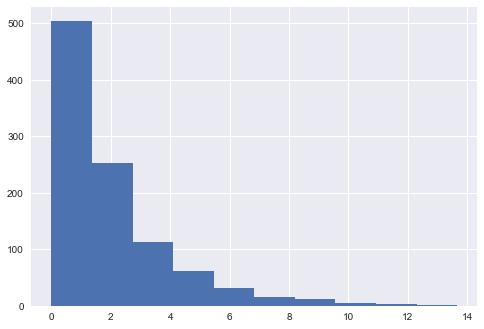

In [4]:
hist(chi_1)

### Creo una funzione per generare altre chi quadro con 2 g.d.l. affiancandole per colonna alla precedente

In [5]:
def aggiungi_chi2(x, n_rep):
    
    # numero di valori uguale alla lunghezza di X
    n_var = len(x.index)
    
    # fare n_rep iterazioni in ciascuna delle quali generare una uniforme
    for _ in range(n_rep):
        x_new = pd.DataFrame(np.random.chisquare(2, size=n_var))
        x = pd.concat([x, x_new], axis = 1)
        
    # rinominare le colonne
    x.columns = range(n_rep + 1)
    
    return x

### Applico la funzione "aggiungi_chi2" per generare un'altra v.c. uniforme

In [6]:
chi_5 = aggiungi_chi2(chi_1, 4)
chi_5

,0,1,2,3,4
0,2.384544,0.170886,1.099881,6.975218,0.346321
1,0.674135,1.366551,0.998513,2.558713,6.933598
2,0.514568,0.681856,0.074783,0.401521,1.878958
3,1.602867,2.043257,4.308668,4.274622,0.357666
4,2.542142,1.386038,2.256989,1.296430,3.260846
5,1.100195,0.073421,3.012476,3.752763,0.304360
6,7.901964,0.767311,2.191559,3.554619,0.631925
7,2.309285,1.343003,0.840143,0.035006,1.655415
8,1.311440,1.698217,1.413656,0.532264,0.330301
9,0.995547,0.221576,0.275642,4.840298,0.181543


### Calcolo le medie di riga del dataset (combinazione lineare delle 4 v.c. chi quadro)

In [7]:
medie_5 = chi_5.mean(axis = 1)

(array([  43.,  170.,  250.,  216.,  128.,  100.,   50.,   26.,   11.,    6.]),
 array([ 0.27852841,  0.77004231,  1.26155621,  1.75307011,  2.244584  ,
         2.7360979 ,  3.2276118 ,  3.71912569,  4.21063959,  4.70215349,
         5.19366739]),
 <a list of 10 Patch objects>)

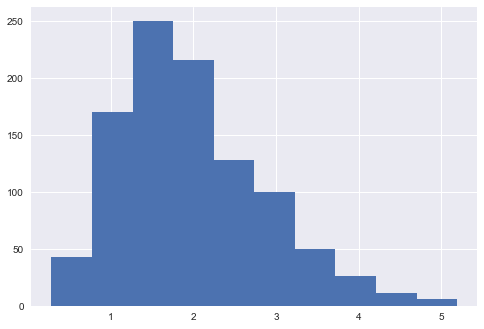

In [8]:
hist(medie_5)

**Una combinazione lineare di sole 5 v.c. chi quadro non è ancora sufficiente per la convergenza ad una normale.** 

### Applico la funzione "aggiungi_chi2" per generare altre 29 chi quadro

In [9]:
chi_30 = aggiungi_chi2(chi_1, 29)
chi_30

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,2.384544,1.558741,0.087835,4.563630,0.719804,6.241843,2.176190,3.041888,2.012539,6.603698,...,1.027787,1.709028,0.156917,0.333920,0.290577,1.601731,4.488918,1.529009,1.959954,1.100592
1,0.674135,0.510244,0.658941,1.474178,1.087152,0.016757,3.662495,0.342968,3.402864,0.073063,...,0.933470,0.800169,0.044704,2.087670,0.417492,3.728492,1.338416,8.552228,2.677272,2.650406
2,0.514568,3.636181,1.291830,2.710197,1.044471,0.908162,3.470619,3.351389,1.138681,8.566591,...,0.156602,5.219505,2.550878,0.451810,0.730386,2.550788,1.221732,2.053966,0.556201,2.531964
3,1.602867,1.738536,0.404325,0.098556,1.648112,4.260514,0.916504,0.391818,0.686209,3.718842,...,3.450692,9.186882,4.414951,4.332228,0.199480,0.917429,2.080431,0.297973,0.314349,1.802247
4,2.542142,1.359201,2.988735,1.976180,0.349434,0.000542,0.386177,0.371187,3.109761,0.080295,...,1.268249,3.641912,0.465317,2.549408,3.150338,0.521339,0.488544,5.956455,6.403819,2.169321
5,1.100195,1.861472,4.667040,2.662068,0.122582,2.273121,0.239055,1.172908,3.392094,3.856300,...,0.882059,1.551027,2.728697,0.929213,0.071571,3.202889,2.067449,4.063279,0.366746,0.874002
6,7.901964,0.814183,0.476158,1.630045,0.002675,0.019095,2.263980,0.250484,0.940627,0.551422,...,3.251970,2.802021,0.679932,0.109270,0.069134,0.184119,1.768167,1.656602,0.897821,1.399980
7,2.309285,3.267439,2.750031,0.654533,0.643577,2.626895,6.225691,6.533523,0.448216,0.663307,...,1.206847,1.579909,5.060362,4.689891,0.268591,1.581406,1.179347,8.077435,4.400245,1.357945
8,1.311440,1.787265,0.606597,5.599314,0.767118,1.469343,6.651392,1.214323,0.823044,3.647282,...,9.219714,1.857061,8.020631,0.359702,0.742877,0.938092,0.523754,1.431370,2.419771,0.578644
9,0.995547,3.782435,0.853091,1.231986,6.897657,0.327090,0.870695,0.188926,4.559582,1.620082,...,4.231342,0.140307,5.328481,3.583467,1.737234,0.936112,0.541787,3.870694,1.290946,4.853731


### Calcolo le medie di riga del dataset (combinazione lineare delle 30 v.c. chi quadro)

In [10]:
medie_30 = chi_30.mean(axis = 1)

(array([   3.,   20.,  119.,  228.,  264.,  216.,  107.,   31.,    9.,    3.]),
 array([ 0.86592844,  1.11408926,  1.36225008,  1.6104109 ,  1.85857171,
         2.10673253,  2.35489335,  2.60305416,  2.85121498,  3.0993758 ,
         3.34753662]),
 <a list of 10 Patch objects>)

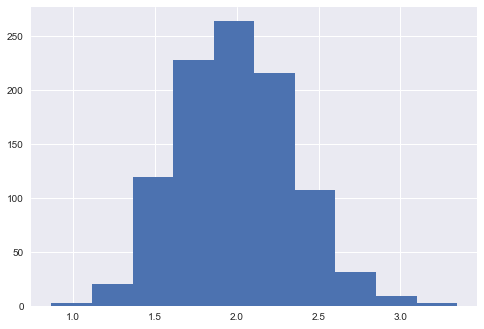

In [11]:
hist(medie_30)

In [12]:
np.mean(medie_30), np.var(medie_30)

(1.9907508547074655, 0.12039748138012761)

La media è vicina a 2 e la varianza vicina ad 4/30 = 0.13.